In [1]:
%matplotlib notebook
import os
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import trackpy as tp
import utils
import analysis
from openpyxl import load_workbook

TRACKS_DIR = '/home/daniel/Documents/programming/Image Processing/object_colocalisation/test/'
TRACKS_PATH = TRACKS_DIR + 'KS 1_channels_10_obcol.xlsx'
NUCLEUS_PATH = TRACKS_DIR + 'Results from KS 1 in µm per sec.csv'

In [83]:
import pandas as pd
for filename in os.listdir(TRACKS_DIR):
    if filename.endswith(".xlsx"):
        print(filename)
        tracks_path = os.path.join(TRACKS_DIR, filename)
        book = load_workbook(tracks_path)
        writer = pd.ExcelWriter(tracks_path, engine='openpyxl')
        writer.book = book
        writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

        columns = ['x', 'y', 'frame', 'patch id', 'particle']
        chans = ['red', 'green']
        data_dict = {}
        for chan in chans:
            input_data = pd.read_excel(TRACKS_PATH, sheetname="{} tracks".format(chan))
            data = []
            for d in input_data.iterrows():
                data.append(d[1].values[0])

            data_frames = []
            for d in data:
                rows = []
                d_str = d.split('\n')
                for ds in d_str[2:]:
                    try:
                        rows.append([float(val) for val in ds.split()[1:]])
                    except ValueError:
                        pass
                ds_df = pd.DataFrame(rows)
                ds_df.columns = columns
                data_frames.append(ds_df)

            tracks_df = pd.concat(data_frames)
            tracks_df.to_excel(writer, sheet_name="{} tracks".format(chan))

        writer.save()

WT 0-30min_channels_20_obcol.xlsx


AttributeError: 'numpy.float64' object has no attribute 'split'

In [3]:
d, s, r = analysis.distance_to_reference(TRACKS_PATH, NUCLEUS_PATH)

Frame 60: 149 trajectories present
calculating distance and fitting green tracks
calculating distance and fitting red tracks


In [2]:
processed = analysis.batch_distance_to_reference(TRACKS_DIR)

processing KS 1_channels_10_obcol.xlsx
reading sheet red tracks
reading sheet green tracks
31
calculating distance and fitting green tracks
0.0
1.0
2.0
3.0
4.0
5.0
7.0
8.0
10.0
11.0
12.0
13.0
14.0
15.0
17.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
5.0
6.0
7.0
8.0
9.0
10.0
12.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
22.0
7.0
8.0
9.0
10.0
11.0
13.0
14.0
15.0
16.0
17.0
19.0
8.0
9.0
10.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
9.0
10.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
12.0
13.0
14.0
15.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
13.0
15.0
16.0
17.0
19.0
20.0
22.0
23.0
24.0
25.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
25.0
26.0
28.0
29.0
30.0
31.0


IndexError: single positional indexer is out-of-bounds

In [32]:
def mean_slope_per_image(folder, channels, condition, data):
    mean_slopes = {}
    mean_slopes['green'] = []
    mean_slopes['red'] = []    
    for filename in os.listdir(folder):
        if filename.endswith(".xlsx"):
            if channels in filename and condition in filename:
                print(filename)
                for k in data[filename][1].iterkeys():
                    slopes = data[filename][1][k]
                    if isinstance(slopes, list):
                        mean_slopes[k].append(np.NAN)
                    else:
                        mean_slopes[k].append(slopes[slopes['good'] == True]['slope'].mean())
    return mean_slopes

In [33]:
wt_ms_20 = mean_slope_per_image(TRACKS_DIR, '20', 'WT', processed)
wt_ms_chan_0 = wt_ms_20['green']
wt_ms_chan_2 = wt_ms_20['red']

ks_ms_20 = mean_slope_per_image(TRACKS_DIR, '20', 'KS', processed)
ks_ms_chan_0 = ks_ms_20['green']
ks_ms_chan_2 = ks_ms_20['red']

WT 0-30min 4_channels_20_obcol.xlsx
WT 0-30min 3_channels_20_obcol.xlsx
WT 0-30min_channels_20_obcol.xlsx
WT 0-30min 2_channels_20_obcol.xlsx
KS 0-30min 3_channels_20_obcol.xlsx
KS 0-30min 2_channels_20_obcol.xlsx
KS 0-30min_channels_20_obcol.xlsx


In [34]:
wt_ms_10 = mean_slope_per_image(TRACKS_DIR, '10', 'WT', processed)
wt_ms_chan_1 = wt_ms_10['green']

ks_ms_10 = mean_slope_per_image(TRACKS_DIR, '10', 'KS', processed)
ks_ms_chan_1 = ks_ms_10['green']

WT 0-30min_channels_10_obcol.xlsx
WT 0-30min 4_channels_10_obcol.xlsx
WT 0-30min 3_channels_10_obcol.xlsx
WT 0-30min 2_channels_10_obcol.xlsx
KS 0-30min 3_channels_10_obcol.xlsx
KS 0-30min_channels_10_obcol.xlsx
KS 0-30min 2_channels_10_obcol.xlsx


<IPython.core.display.Javascript object>


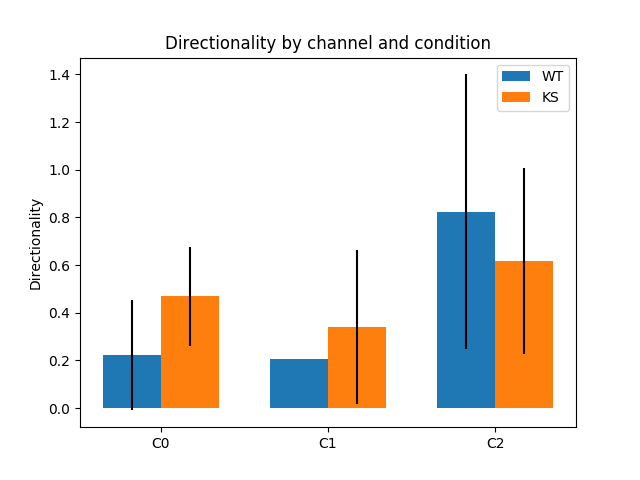

In [37]:
N = 3
wt_means = (np.nanmean(wt_ms_chan_0), np.nanmean(wt_ms_chan_1), np.nanmean(wt_ms_chan_2))
ks_means = (np.nanmean(ks_ms_chan_0), np.nanmean(ks_ms_chan_1), np.nanmean(ks_ms_chan_2))

wt_stderr = (stats.sem(wt_ms_chan_0), stats.sem(wt_ms_chan_1), stats.sem(wt_ms_chan_2))
ks_stderr = (stats.sem(ks_ms_chan_0), stats.sem(ks_ms_chan_1), stats.sem(ks_ms_chan_2))

ind = np.arange(N) 
width = 0.35
plt.figure()
plt.bar(ind, wt_means, width, label='WT', yerr=wt_stderr)
plt.bar(ind + width, ks_means, width, label='KS', yerr=ks_stderr)

plt.ylabel('Directionality')
plt.title('Directionality by channel and condition')

plt.xticks(ind + width / 2, ('C0', 'C1', 'C2'))
plt.legend(loc='best')
plt.savefig(os.path.join(TRACKS_DIR, 'directionality.png'))
plt.show()

In [26]:
def plot_distance(folder, channels, condition, data):
    chans = {'red': list(channels)[0], 'green': list(channels)[1]}
    for filename in os.listdir(folder):
        if filename.endswith(".xlsx"):
            if channels in filename and condition in filename:
                shortname = filename[0: filename.index('_')]
                for k, v in data[filename][0].iteritems():
                    plt.figure()
                    for pid, p in v.groupby('particle'):
                        plt.plot(p['frame'].values, p['distance'].values)
                    plt.xlabel('Frame number')
                    plt.ylabel('Distance to reference [um]')
                    title = 'All tracks in {} channel {}'.format(shortname, chans[k])
                    plt.title(title)
                    plt.savefig(os.path.join(TRACKS_DIR, title + '.png'))
                    plt.show()

<IPython.core.display.Javascript object>


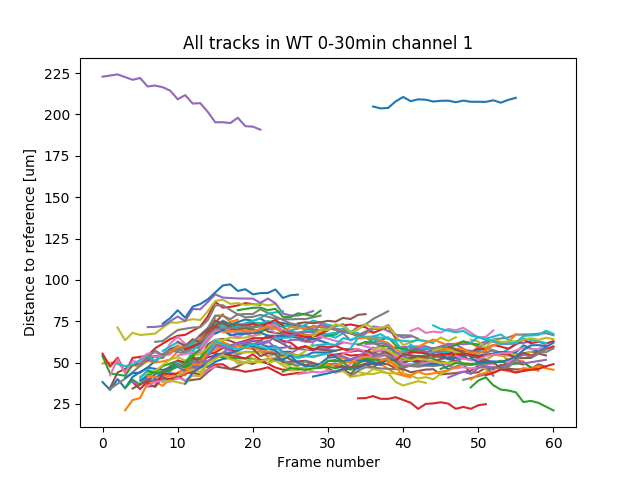

<IPython.core.display.Javascript object>


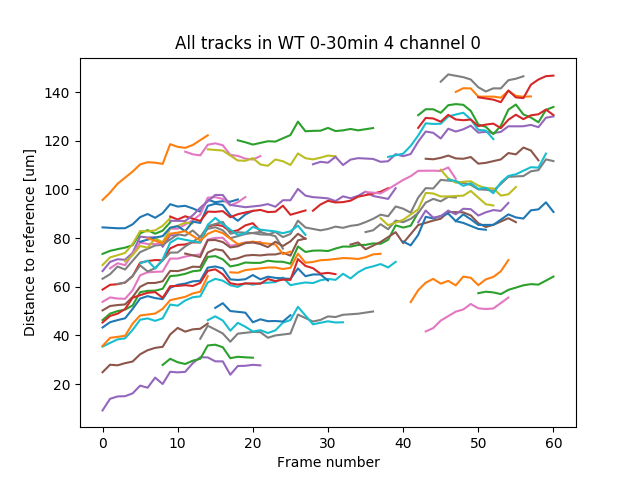

<IPython.core.display.Javascript object>


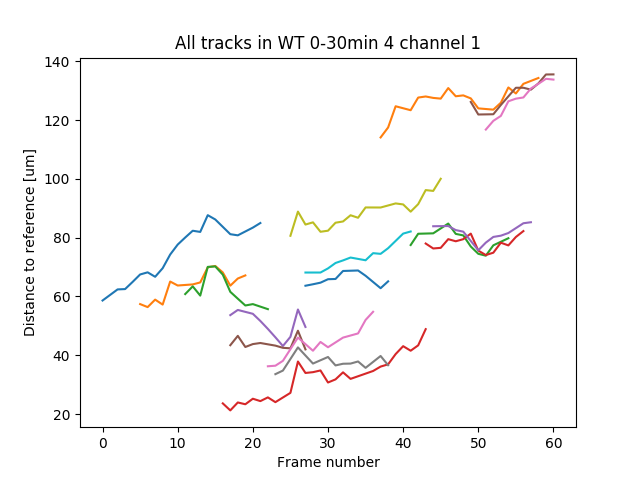

<IPython.core.display.Javascript object>


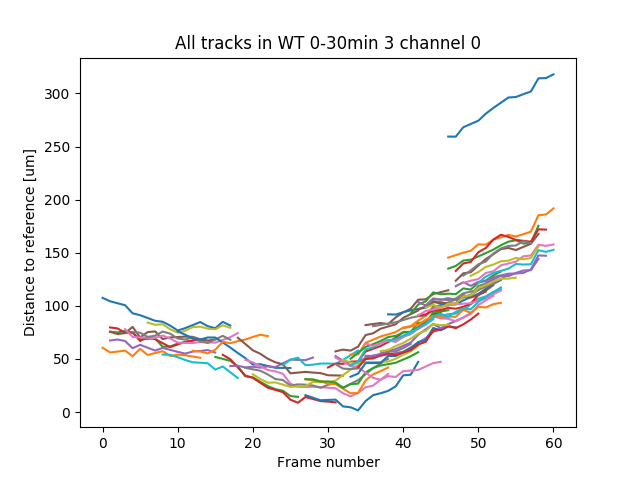

<IPython.core.display.Javascript object>


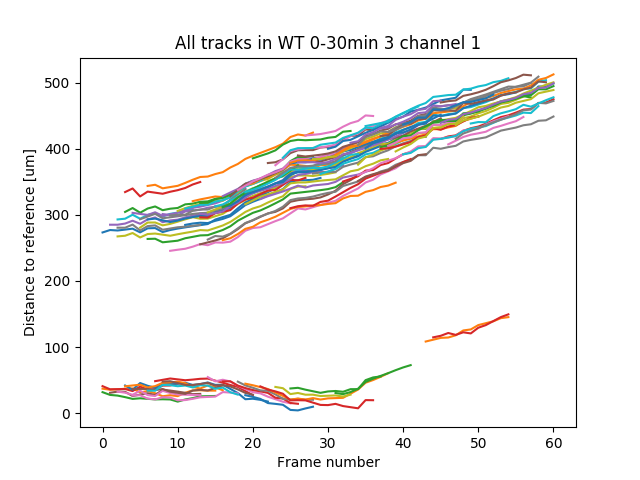

<IPython.core.display.Javascript object>


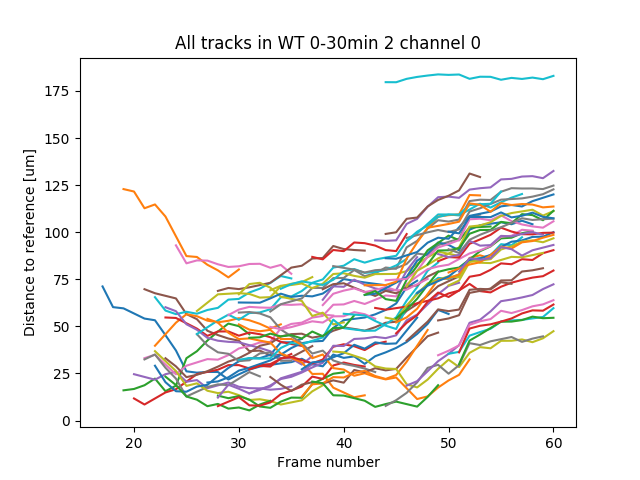

<IPython.core.display.Javascript object>


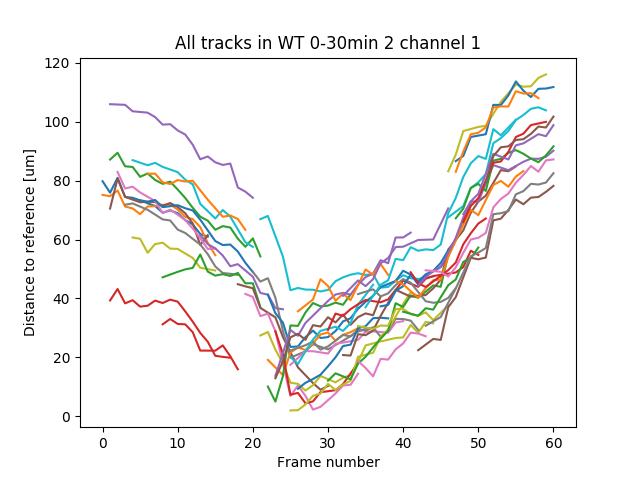

In [29]:
plot_distance(TRACKS_DIR, '10', 'WT', processed)

<IPython.core.display.Javascript object>


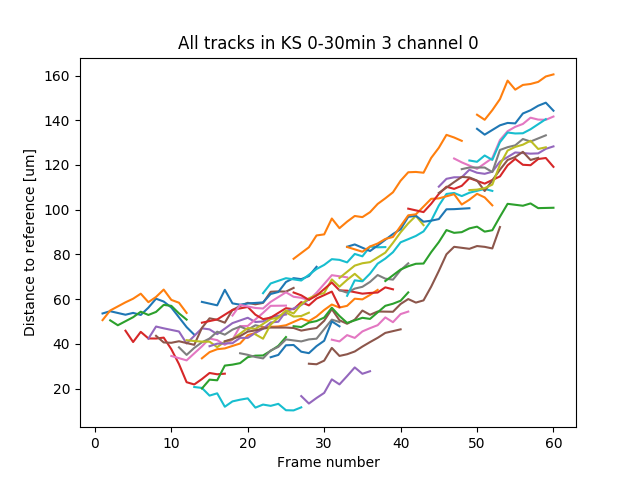

<IPython.core.display.Javascript object>


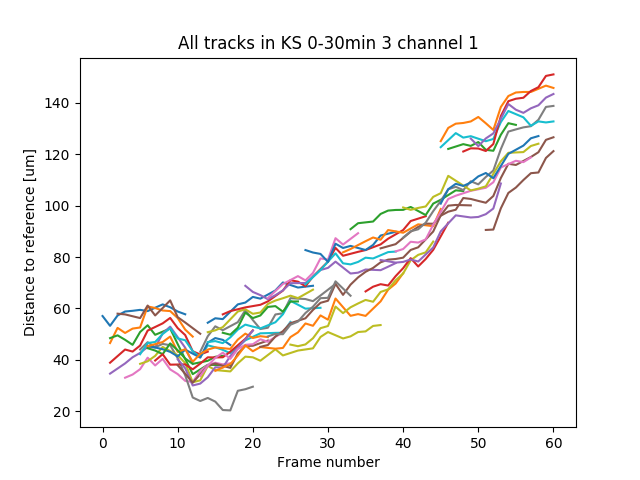

<IPython.core.display.Javascript object>


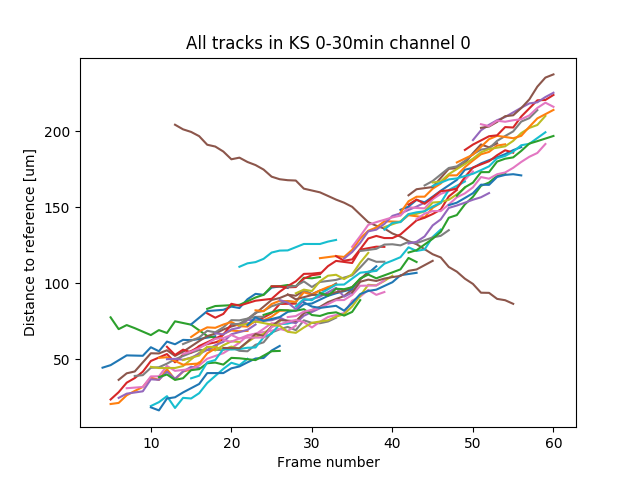

<IPython.core.display.Javascript object>


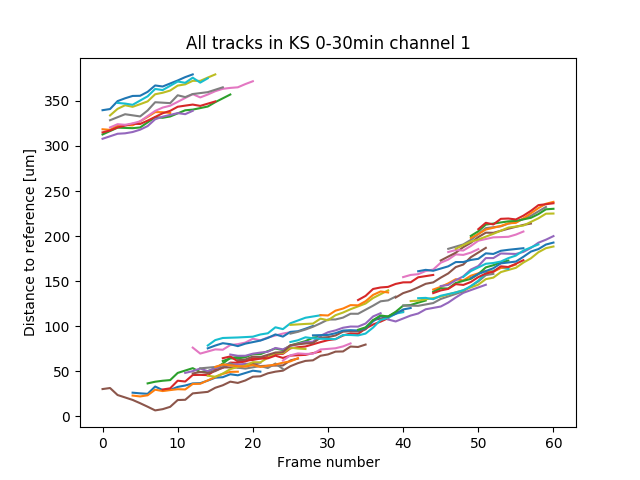

<IPython.core.display.Javascript object>


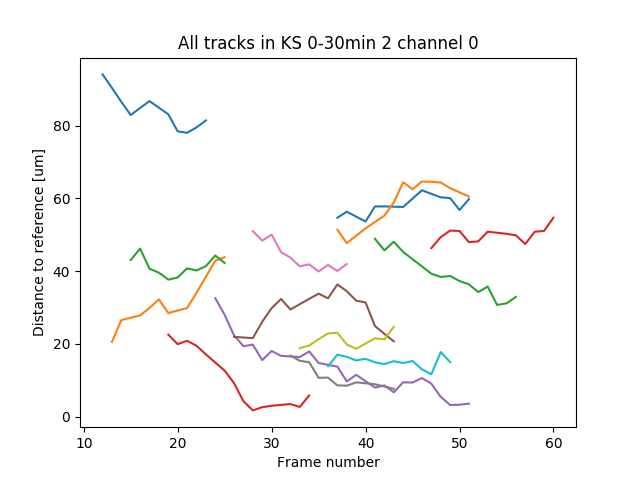

<IPython.core.display.Javascript object>


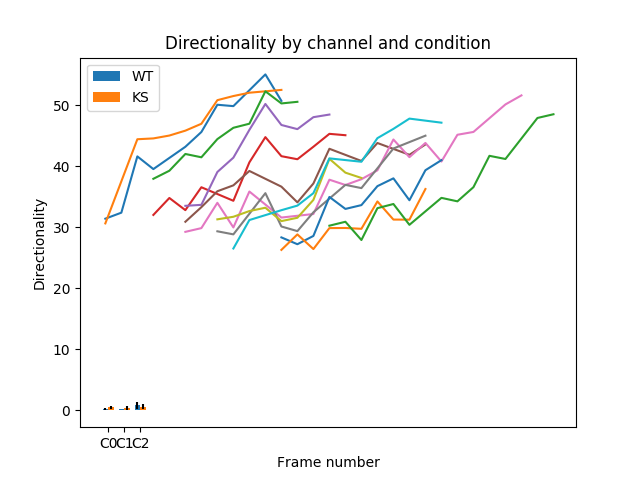

In [30]:
plot_distance(TRACKS_DIR, '10', 'KS', processed)

<IPython.core.display.Javascript object>


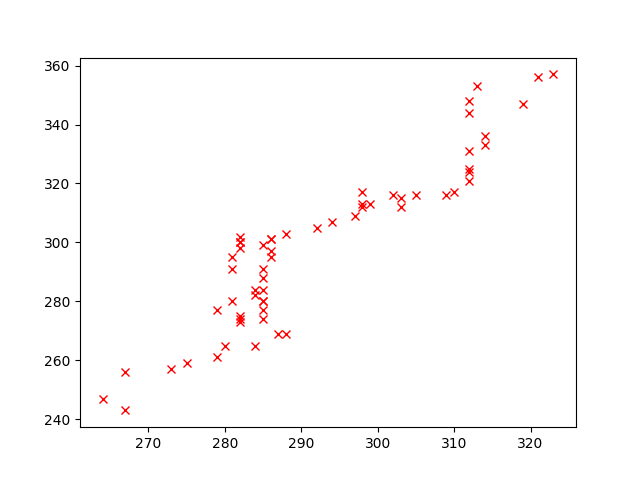

<IPython.core.display.Javascript object>


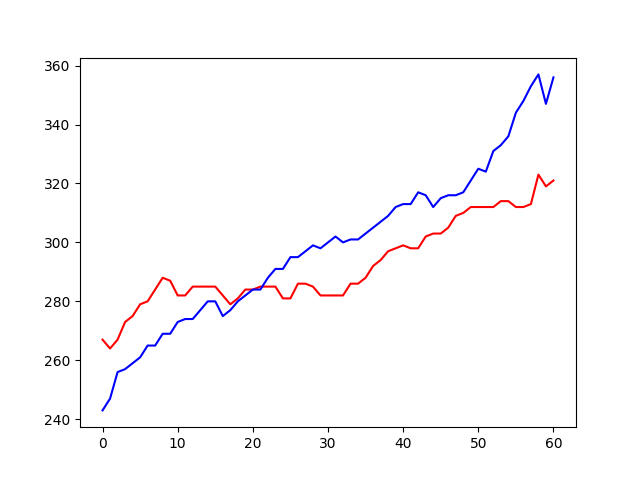

In [5]:
# plot the nucleus centroids
t = xrange(0, nucleus.shape[0])
plt.figure()
plt.plot(nucleus['x'], nucleus['y'], 'rx')
plt.show()

plt.figure()
plt.plot(t, nucleus['x'], 'r')
plt.plot(t, nucleus['y'], 'b')
plt.show()

<IPython.core.display.Javascript object>


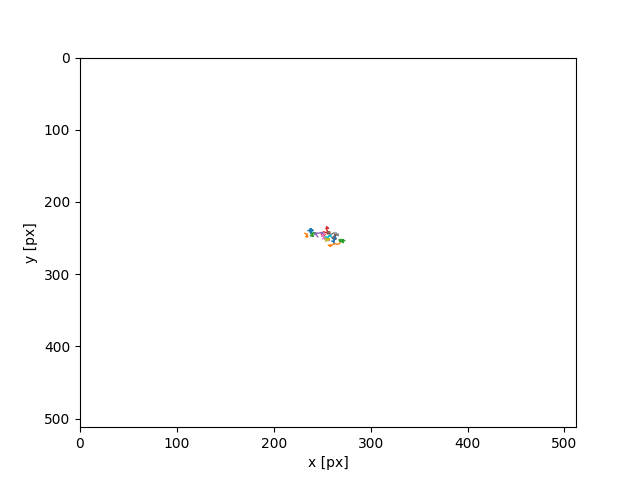

<IPython.core.display.Javascript object>


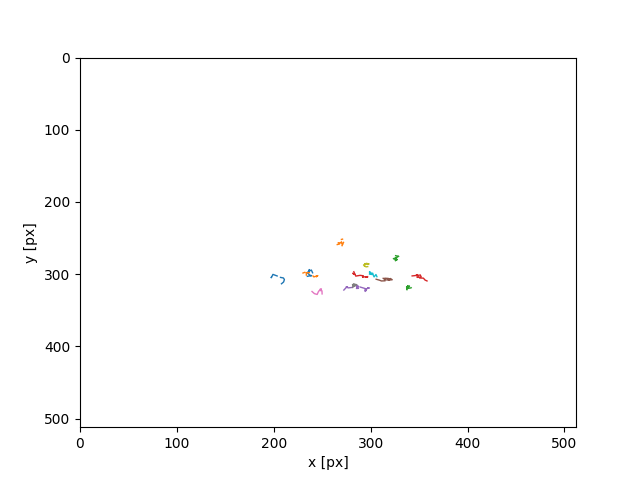

(512, 0)

In [6]:
# plot the tracks
plt.figure()
ax1 = tp.plot_traj(tracks['red'])
ax1.set_xlim([0, 512])
ax1.set_ylim([512, 0])
plt.figure()
ax2 = tp.plot_traj(tracks['green'])
ax2.set_xlim([0, 512])
ax2.set_ylim([512, 0])

<IPython.core.display.Javascript object>


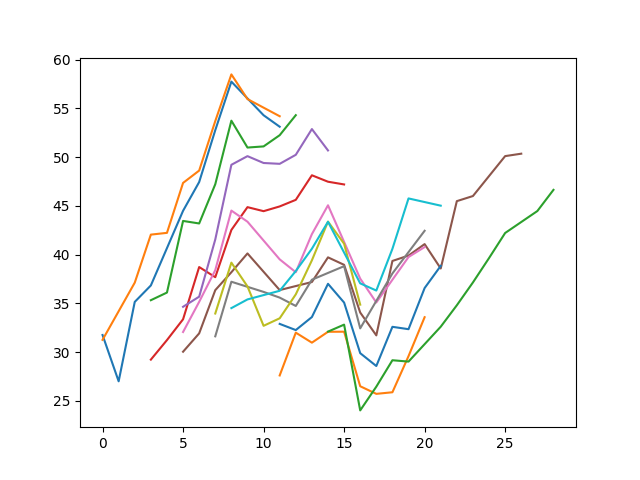

<IPython.core.display.Javascript object>


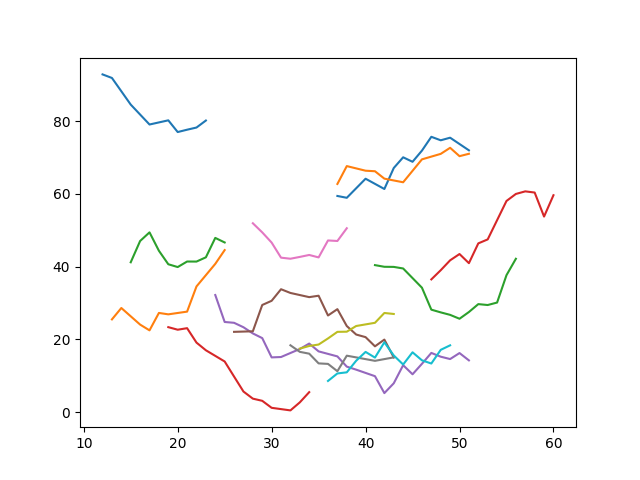

In [7]:
# plot the distance
plt.figure()
for tid, track in tracks['red'].groupby('particle'):
    plt.plot(track['frame'], track['distance'])
plt.show()

plt.figure()
for tid, track in tracks['green'].groupby('particle'):
    plt.plot(track['frame'], track['distance'])
plt.show()

In [4]:
len(processed[0])

2

In [5]:
tracks0 = processed[0][0]

In [6]:
tracks0

{'green':        frame  patch id           x           y  particle    distance
 frame                                                               
 1          1        17  226.400000  258.800000       0.0   53.600373
 2          2        17  228.500000  258.500000       0.0   54.612270
 4          4        13  230.000000  262.000000       0.0   53.037722
 5          5        10  228.250000  262.125000       0.0   53.859336
 6          6        17  232.888889  260.666667       0.0   52.940334
 7          7        14  230.045455  258.227273       0.0   56.201416
 8          8        14  229.250000  255.000000       0.0   60.200187
 9          9        16  229.666667  258.333333       0.0   58.939706
 10        10        10  228.500000  258.000000       0.0   56.269441
 12        12         5  228.515152  255.878788       0.0   47.503187
 13        13        10  231.500000  257.500000       0.0   44.096485
 1          1        19  229.500000  255.500000       1.0   50.621142
 2         